# VISUALIZATION LAB - Continuation of the EuroLeague Case Study
## Let's compare the competitions!

![](https://eurospects.com/wp-content/uploads/2018/10/eurocupeuroleague.png)

First of all, we must 

- Import the actual.csv Dataset. This dataset will be the CSV of the result obtained in class.
- Import ec23.xlsx. This dataset correspond to the import the dataset corresponding to Eurocup. Don't worry, this time the Excel will be cleaned (almost)


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
competition = pd.read_csv("eurcasestudy.csv")

Based on the last lab, you should  have the combination of both competitions in the same dataframe. 

Is time for the questions you must answer... Graphically!

1. How many matches have been in each competition?
2. What are the maximum points that a local team has scored per competition? And the road team as well. 
3. Do the same operations with the average points (per competition)
4. Can you tell me the maximum difference that has been in a match, splitted by competition? 
    - Careful: The Plusminus is both positive and negative, being negative that the Road Team has achieved the Victory. To have the absolute, create a new Column named Absolut_Plusminus. Remember: np.where is life!
5. Also grouped by competition, give me the number of victories of the Locals and the Visitors

In [3]:
# 1
competition["Competition"].value_counts()

Competition
Euroleague    225
Eurocup       170
Name: count, dtype: int64

In [4]:
# 2
competition.groupby(by = ["Competition"]).agg({"Localscore": "max", "Roadscore": "max"})

,Localscore,Roadscore
Competition,,
Eurocup,120,114.0
Euroleague,130,126.0


In [5]:
# 3
competition.groupby(by = ["Competition"]).agg({"Localscore": "mean", "Roadscore": "mean"})

,Localscore,Roadscore
Competition,,
Eurocup,85.235294,83.958824
Euroleague,83.284444,79.173333


In [8]:
# 4
competition["Absolut_Plusminus"] = np.where(competition["Plusminus"] < 0, -competition["Plusminus"], competition["Plusminus"])

competition.groupby(by = ["Competition"]).agg({"Absolut_Plusminus": "max"})

,Absolut_Plusminus
Competition,
Eurocup,39.0
Euroleague,39.0


In [9]:
# 5
competition.groupby(by = ["Competition"]).agg({"Ganador": "value_counts"})

Ganador
Competition Ganador           
Eurocup     Local           90
            Visitante       80
Euroleague  Local          150
            Visitante       75

# More Graphs!

Create one of each of the following graph types, with variables of your choice, and add at least two comments describing something interesting of each graph:

1. Comparison Charts (Barplot, Scatterplot or Countplot)
2. Histogram
3. Stack columns Chart
4. Correlation Matrix/Heatmap
5. Trends (Line Charts)

In [12]:
#DataFrame
competition.sample(5)   # column "Unnamed: 0" didn't exist in my final DataFrame of the previous lab (related to the export to use in this one?)

,Unnamed: 0,Competition,Localscore,Roadscore,Plusminus,Ganador,Absolut_Plusminus
309,85,Eurocup,84,89.0,-5.0,Visitante,5.0
89,89,Euroleague,71,93.0,-22.0,Visitante,22.0
363,140,Eurocup,79,64.0,15.0,Local,15.0
81,81,Euroleague,100,101.0,-1.0,Visitante,1.0
282,57,Eurocup,83,88.0,-5.0,Visitante,5.0


<Axes: xlabel='Competition', ylabel='count'>

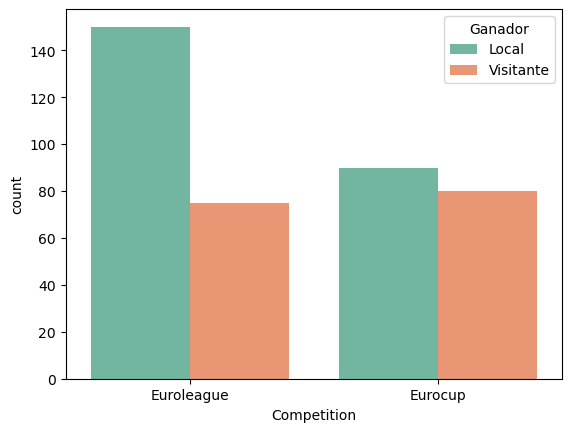

In [26]:
# Comparison Chart - Countplot
sns.countplot(data = competition, x = "Competition", palette = "Set2", hue = "Ganador")

<Axes: xlabel='Competition', ylabel='Localscore'>

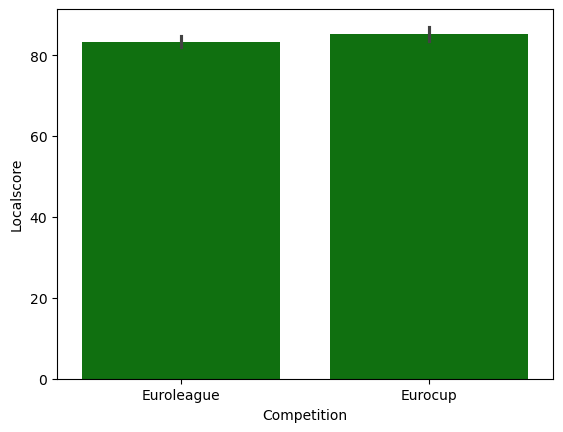

In [30]:
# Comparison Chart - Localscore Barplot
competition.groupby("Competition")["Localscore"].mean()
sns.barplot(data = competition, x = "Competition", y = "Localscore", color ="green")

<Axes: xlabel='Competition', ylabel='Roadscore'>

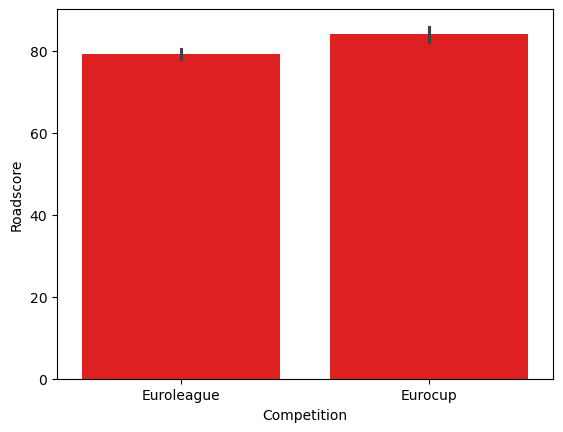

In [31]:
# Comparison Chart - Roadscore Barplot
competition.groupby("Competition")["Roadscore"].mean()
sns.barplot(data = competition, x = "Competition", y = "Roadscore", color ="red")

**Your comments here**
- More games have been played in Euroleague than in Eurocup.
- The ratio "Local Winner vs Visitor Winner" is higher in Euroleague.
- Localscore mean in Euroleague is slightly lower than in Eurocup, but always above 80 in both competition.
- Same rationale for Roadscore mean; however, while this mean in Euroleague is below 70, in Eurocup stays above 80. 
- Thus, it's assumed that Visitors in Euroleague score less than in Eurocup, on average.  

<Axes: xlabel='Localscore', ylabel='Count'>

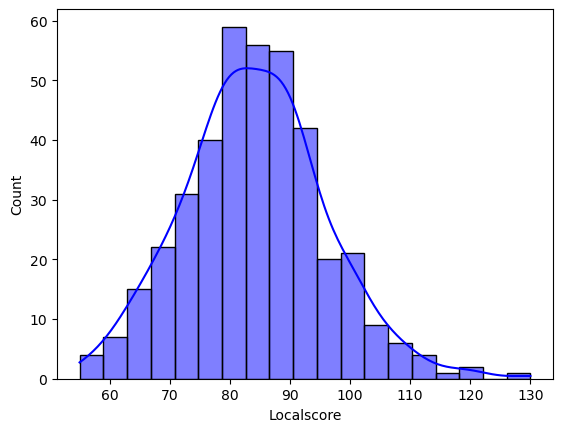

In [40]:
# Histogram - Localscore
sns.histplot(data = competition, x = "Localscore", kde = True, color = "blue")

<Axes: xlabel='Roadscore', ylabel='Count'>

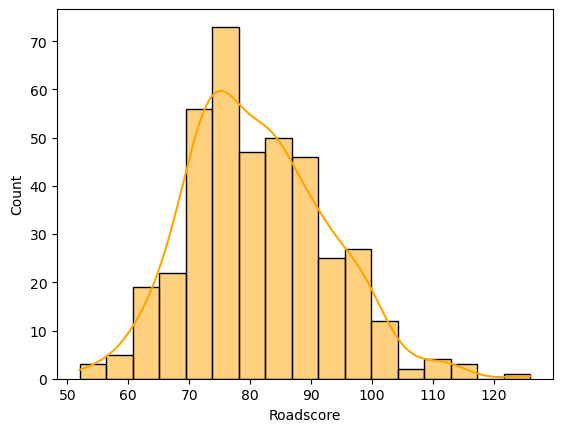

In [41]:
# Histogram - Roadcore
sns.histplot(data = competition, x = "Roadscore", kde = True, color = "orange")

<Axes: xlabel='Plusminus', ylabel='Count'>

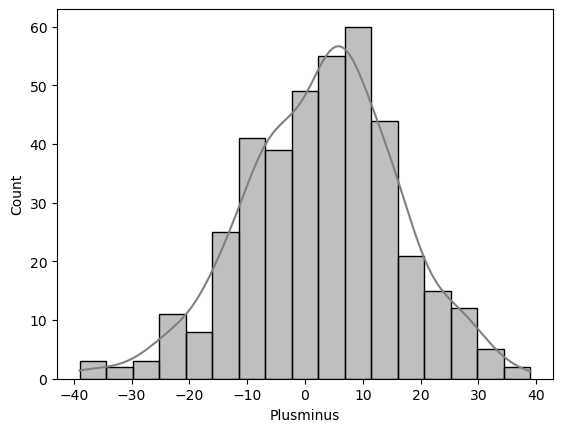

In [43]:
# Histogram - Plusminus
sns.histplot(data = competition, x = "Plusminus", kde = True, color = "grey")

**Your comments here**
- Localscores are mostly centralized on the range of 80 and 90.
- Roadscores are mostly centralized on the range of 70 and 80.
- The above statements are consistent when looking at the Plusminus; since it is centralized on the range of -10 and 10. 

In [79]:
# Stacked columns
stacked = competition.groupby(by = ["Competition", "Ganador"])["Ganador"].value_counts()
stacked

Competition  Ganador  
Eurocup      Local         90
             Visitante     80
Euroleague   Local        150
             Visitante     75
Name: count, dtype: int64

<Axes: xlabel='Competition,Ganador'>

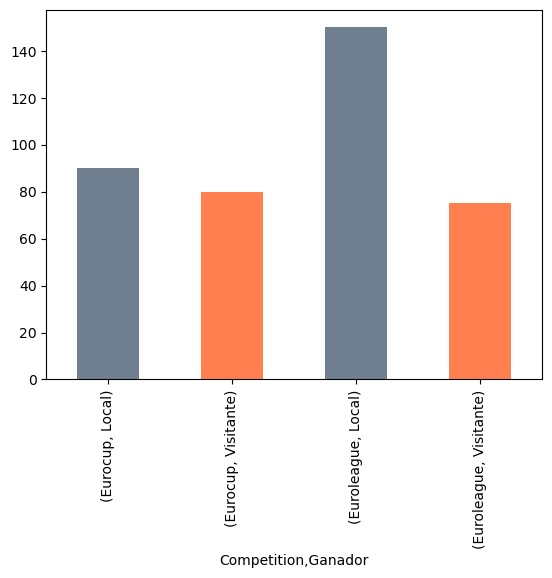

In [80]:
# Stacked columns
stacked.plot(kind = "bar", color = ["slategrey", "coral"])

In [81]:
# Unstacked columns
unstacked = competition.groupby(by = ["Competition", "Ganador"])["Ganador"].value_counts().unstack()
unstacked

Ganador,Local,Visitante
Competition,,
Eurocup,90,80
Euroleague,150,75


<Axes: xlabel='Competition'>

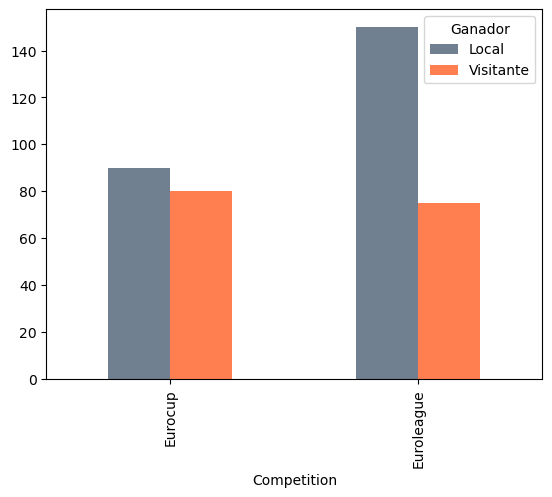

In [82]:
# Unstacked columns
unstacked.plot(kind = "bar", color = ["slategrey", "coral"])

<Axes: xlabel='Competition', ylabel='Count'>

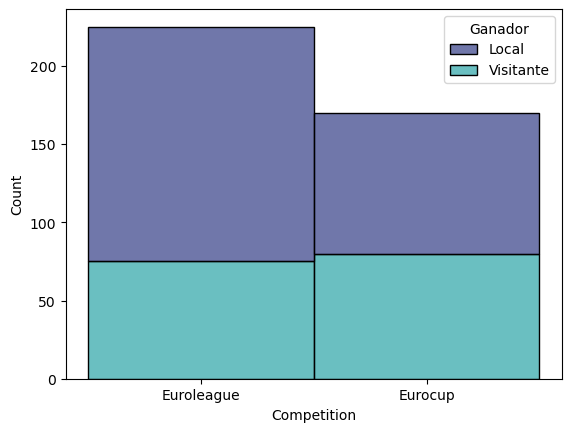

In [87]:
# Stack columns Chart (hue = "Ganador")
sns.histplot(data = competition, x = "Competition", hue = "Ganador", multiple = "stack", palette = "mako")

<Axes: xlabel='Ganador', ylabel='Count'>

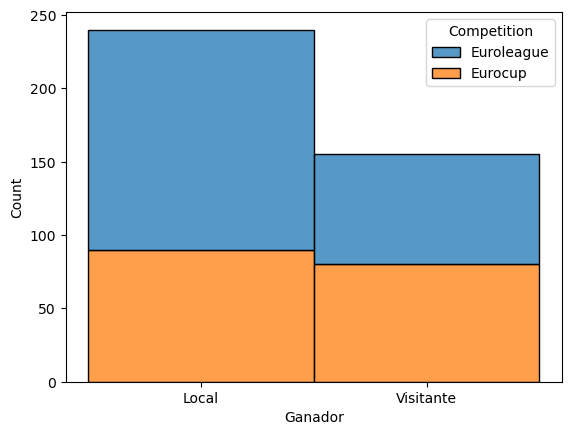

In [86]:
# Stack columns Chart (hue = "Competition")
sns.histplot(data = competition, x = "Ganador", hue = "Competition", multiple = "stack")

**Your comments here**
- The "original" output of such a DataFrame implies the .stack() by default; resulting in 4 rows x 1 column, and so showing 4 separate bars in the plot. 
- The .unstack() allows to group Local-Visitor by Competition in the plot, since its output is shown in 2 rows x 2 columns.
- It is shown how the ratio "Local Winner vs Visitor Winner" is higher in Euroleague (like in the first countplot, by applying the parameter hue = "Competition").
- Same conclusion is reached by using the stack columns chart.   

In [98]:
# Correlation / Heatmap
corr_plus = competition[["Localscore", "Roadscore", "Plusminus"]].corr()
corr_plus

,Localscore,Roadscore,Plusminus
Localscore,1.000000,0.356716,0.583318
Roadscore,0.356716,1.000000,-0.550730
Plusminus,0.583318,-0.550730,1.000000


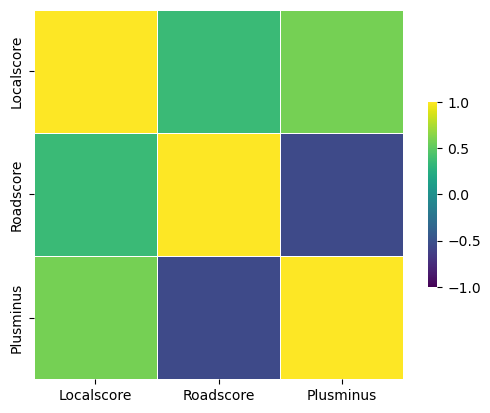

In [99]:
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr_plus,
            cmap = "viridis",
            square = True,
            linewidth = 0.5,
            vmax = 1,   # defining max range
            vmin = -1,   # defining min range
            cbar_kws = {"shrink": .5});   # steps for the scale

In [100]:
# Correlation / Heatmap
corr_absplus = competition[["Localscore", "Roadscore", "Absolut_Plusminus"]].corr()
corr_absplus

,Localscore,Roadscore,Absolut_Plusminus
Localscore,1.000000,0.356716,0.134643
Roadscore,0.356716,1.000000,-0.074829
Absolut_Plusminus,0.134643,-0.074829,1.000000


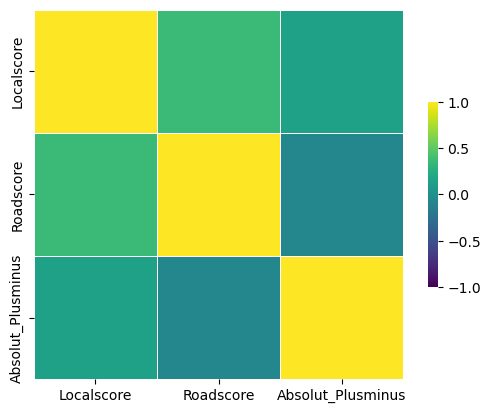

In [101]:
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr_absplus,
            cmap = "viridis",
            square = True,
            linewidth = 0.5,
            vmax = 1,   # defining max range
            vmin = -1,   # defining min range
            cbar_kws = {"shrink": .5});   # steps for the scale

**Your comments here**
- It seems to be a positive correlation between Localscore and Plusminus.
- It seems to be a negative correlation between Roadscore and Plusminus.
- There is a positive correlation between Localscore and Roadscore, but it's lower than the positive correlation between Localscore and Plusminus.
- Correlations are slight different when replacing Plusminus by Absolut_Plusminus.

In [2]:
# Trends

**Your comments here**
- The DataFrame doesn't have date time Series (years, months, days,...), and it's difficult to apply line charts.
- Line charts are commonly used (applied in axis = 1) when some date time Series is in the DataFrame.